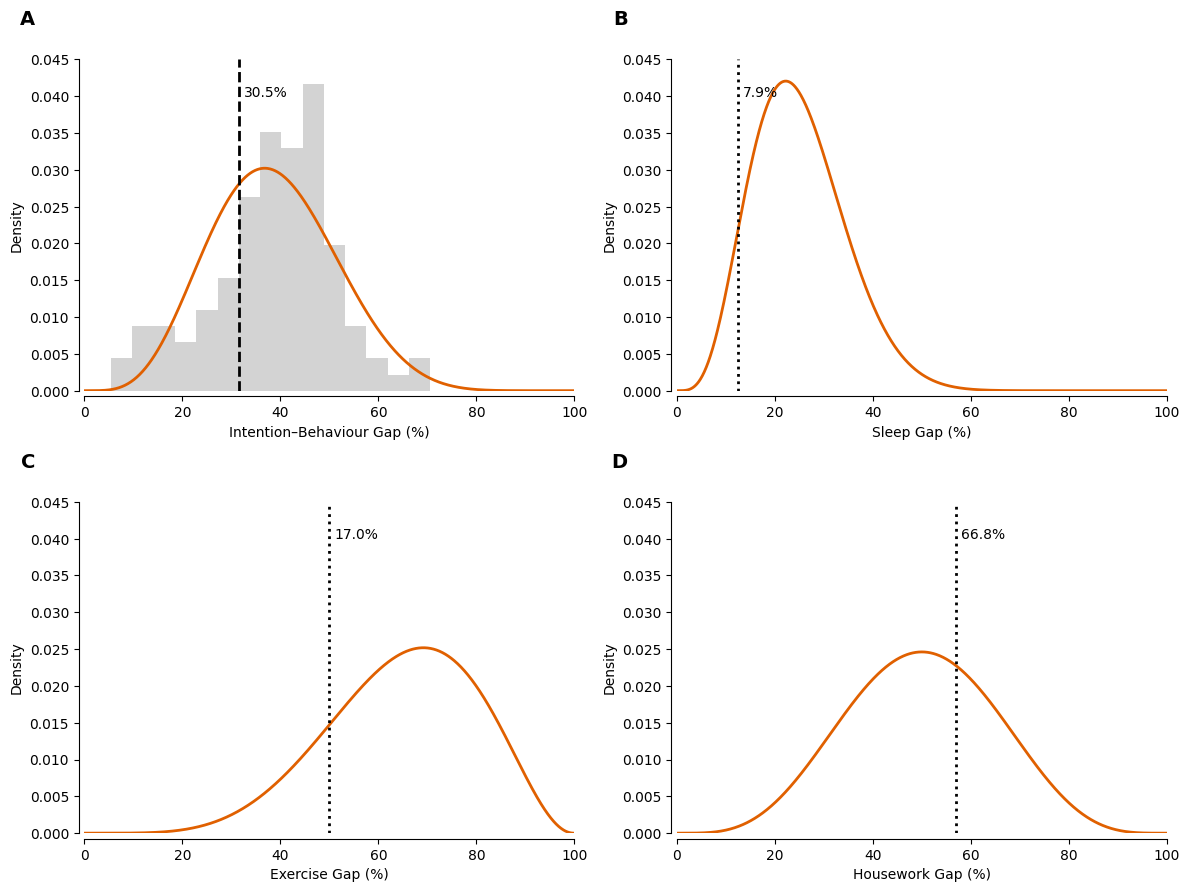

(0.07905036697376358,
 0.16950563771477117,
 0.6678424247110524,
 0.3054661431331957)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# -------------------------------
# 1. Sample & fitted Beta for Plot A
# -------------------------------
sample = np.array([
12.589245192810505, 35.409840987341774, 51.42244304308463, 47.75539861030932,
48.125628548469145, 42.741060084328026, 16.37883688948813, 69.42326585091261,
32.49066623210776, 39.388205166666665, 13.114150844577727, 32.06781867201364,
32.98134006470586, 45.63030446913581, 44.934884492753625, 26.77192729577465,
31.04281172135871, 52.947118490838896, 42.48549196139699, 26.499388146341467,
44.8219541231898, 44.64185271084354, 29.42780755809076, 61.70540515534615,
38.0967861781787, 35.32644177124004, 44.85989759036145, 29.10815361052657,
18.885868673990032, 47.81865470731707, 34.3013688, 27.327318233094832,
20.547183941629903, 34.72754181598781, 40.67184591865405, 37.55204624096386,
38.40575536231884, 46.10272718300883, 40.10372303974215, 42.89909212054961,
48.08069590040054, 33.348317477220874, 27.176988990855154, 53.131269474999996,
63.19999912247797, 22.838153390243903, 5.4900373371591815, 58.60898085195101,
29.26979121205502, 42.8646682091501, 50.56838417933089, 70.57730977929671,
51.40330268218947, 36.89066392857143, 37.29252762815955, 51.733347590361454,
41.54236214095314, 8.381317250168538, 38.39461103921571, 41.920411722640914,
42.98265055949922, 55.134226268806025, 39.17171049056604, 17.81379923809524,
54.22028573809524, 51.12380145017459, 44.880456968215285, 37.150414461027275,
41.9818399836669, 41.58372640963856, 38.592296393974465, 45.633865686746994,
36.017998199332546, 10.662418654854678, 15.336088012876596, 38.20351911111111,
38.62168134521594, 37.02538232835821, 46.53495373493976, 32.51145097732099,
33.91382855421687, 39.77330020131893, 46.9670811965509, 12.587423204819277,
44.21357317918537, 51.491317095238095, 42.30269589041096, 43.25846923216168,
35.43097355077493, 44.70127831111111, 53.91894633358757, 45.50388800499688,
17.62786641058347, 42.645743327402876, 54.02581440476191, 40.99221120387436,
51.184911302732544, 26.574412924883934, 46.92472458505573, 27.02649690476191,
44.720643201351976, 34.674397355829235, 44.6207368541366, 29.101967550985908,
30.44312802380952
])

mean = sample.mean() / 100
var = (sample.std(ddof=1) / 100) ** 2
alpha_A = mean * (1 - mean) / var - 1
alpha_A *= mean
beta_A = (1 - mean) * ((mean * (1 - mean) / var) - 1)

# ---------------------------------
# 2. Beta parameters & cutpoints for B, C, D
# ---------------------------------
# Sleep
alpha_sleep, beta_sleep = 5, 15
x_sleep = 12.5

# Exercise
alpha_ex, beta_ex = 5.92, 3.19
x_exercise = 50

# Housework
alpha_house, beta_house = 5, 5
x_house = 57

# ---------------------------------
# 3. Percentiles
# ---------------------------------
pct_sleep = beta.cdf(x_sleep / 100, alpha_sleep, beta_sleep)
pct_exercise = beta.cdf(x_exercise / 100, alpha_ex, beta_ex)
pct_house = beta.cdf(x_house / 100, alpha_house, beta_house)

avg_pct = (pct_sleep + pct_exercise + pct_house) / 3

# x‑value in Plot A corresponding to avg_pct
x_A_avg = beta.ppf(avg_pct, alpha_A, beta_A) * 100   # back to % scale

# ---------------------------------
# 4. Plotting
# ---------------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 9), facecolor='white')
letters = ['A', 'B', 'C', 'D']
axs = axs.flatten()

# common x & limits
x = np.linspace(0, 100, 1000)
ymax = 0.045

# ---- Plot A
axs[0].hist(sample, bins=15, density=True, color='#d3d3d3')  # light grey
axs[0].plot(x, beta.pdf(x/100, alpha_A, beta_A)/100, color='#e06000', linewidth=2)
# avg percentile line
axs[0].axvline(x_A_avg, color='black', linestyle='--', linewidth=2)
axs[0].text(x_A_avg+1, ymax*0.9, f'{avg_pct*100:.1f}%', ha='left', va='center')
axs[0].set_xlabel('Intention–Behaviour Gap (%)')
axs[0].set_ylabel('Density')
axs[0].set_ylim(0, ymax)

# ---- Plot B (Sleep)
pdfB = beta.pdf(x/100, alpha_sleep, beta_sleep)/100
axs[1].plot(x, pdfB, color='#e06000', linewidth=2)
axs[1].axvline(x_sleep, color='black', linestyle=':', linewidth=2)
axs[1].text(x_sleep+1, ymax*0.9, f'{pct_sleep*100:.1f}%', ha='left', va='center')
axs[1].set_xlabel('Sleep Gap (%)')
axs[1].set_ylabel('Density')
axs[1].set_ylim(0, ymax)

# ---- Plot C (Exercise)
pdfC = beta.pdf(x/100, alpha_ex, beta_ex)/100
axs[2].plot(x, pdfC, color='#e06000', linewidth=2)
axs[2].axvline(x_exercise, color='black', linestyle=':', linewidth=2)
axs[2].text(x_exercise+1, ymax*0.9, f'{pct_exercise*100:.1f}%', ha='left', va='center')
axs[2].set_xlabel('Exercise Gap (%)')
axs[2].set_ylabel('Density')
axs[2].set_ylim(0, ymax)

# ---- Plot D (Housework)
pdfD = beta.pdf(x/100, alpha_house, beta_house)/100
axs[3].plot(x, pdfD, color='#e06000', linewidth=2)
axs[3].axvline(x_house, color='black', linestyle=':', linewidth=2)
axs[3].text(x_house+1, ymax*0.9, f'{pct_house*100:.1f}%', ha='left', va='center')
axs[3].set_xlabel('Housework Gap (%)')
axs[3].set_ylabel('Density')
axs[3].set_ylim(0, ymax)

# ---- Common styling
for i, ax in enumerate(axs):
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines['left'].set_position(('outward', 4))
    ax.spines['bottom'].set_position(('outward', 4))
    ax.text(-0.1, 1.15, letters[i], transform=ax.transAxes,
            fontsize=14, fontweight='bold', va='top', ha='right')
    ax.set_xlim(0, 100)
    ax.set_facecolor('white')

plt.tight_layout()
plt.show()

# Display percentiles so the user can see numbers
pct_sleep, pct_exercise, pct_house, avg_pct


| Panel             | Threshold ( % ) | CDF value | Percentile |
| ----------------- | --------------- | --------- | ---------- |
| **B – Sleep**     | 12.5            | 0.079     | 7.9 %      |
| **C – Exercise**  | 50              | 0.170     | 17.0 %     |
| **D – Housework** | 57              | 0.668     | 66.8 %     |
| **Average**       | —               | —         | 30.5 %     |
